In [1]:
from tensorboard.backend.event_processing import event_accumulator
from google import protobuf
import matplotlib.pyplot as plt

In [2]:
# ea1 = event_accumulator.EventAccumulator('training-logs/damped-sho-with-similarity-embedding-flow-loss-values')
# ea2 = event_accumulator.EventAccumulator('training-logs/damped-sho-without-similarity-embedding-flow-loss-values')

ea1 = event_accumulator.EventAccumulator('events.out.tfevents.1691020465.submit20.mit.edu.745857.0')
ea2 = event_accumulator.EventAccumulator('events.out.tfevents.1691020505.submit20.mit.edu.745862.0')

# ea1 = event_accumulator.EventAccumulator('/home/submit/maanasg/my-notebooks/damped-sho/sho_flow_blocks2-repeats50-run2/events.out.tfevents.1691020465.submit20.mit.edu.745857.0')
# ea2 = event_accumulator.EventAccumulator('/home/submit/maanasg/my-notebooks/damped-sho/sho_flow_blocks2_no_trained_embedding-repeats50-run2/events.out.tfevents.1691020505.submit20.mit.edu.745862.0')

In [3]:
# ls

In [4]:
dir(ea1)
dir(ea2)

ea1.scalars.Keys()
ea2.scalars.Keys()

ea1.tensors.size
ea2.tensors.size

ea1.Reload()
ea2.Reload()

# ea1.Tags(), ea2.Tags()

In [5]:
dir(ea1.Scalars)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [6]:
ea1.Scalars('Flow Loss/train')[0].value, ea2.Scalars('Flow Loss/val')[0].value

(4.838031768798828, 0.8724200129508972)

In [7]:
ea1_vals, ea2_vals, step_vals = [], [], []
ea1_epoch, ea2_epoch, epoch_vals = [], [], []

for i in range(209):
    ea1_vals.append(ea1.Scalars('Flow Loss/train')[i].value)
    ea2_vals.append(ea2.Scalars('Flow Loss/train')[i].value)
    step_vals.append(ea2.Scalars('Flow Loss/train')[i].step)
    if i % 6 ==0:
        epoch_vals.append(i*10)
        ea1_epoch.append(ea1.Scalars('Flow Loss/train')[i].value)
        ea2_epoch.append(ea2.Scalars('Flow Loss/train')[i].value)

ea1_vals_val, ea2_vals_val, step_vals_val = [], [], []
ea1_epoch_val, ea2_epoch_val, epoch_vals_val = [], [], []

for i in range(35):
    if ea1.Scalars('Flow Loss/val')[i].step < 270:
        ea1_vals_val.append(ea1.Scalars('Flow Loss/val')[i].value)
        ea2_vals_val.append(ea2.Scalars('Flow Loss/val')[i].value)
        step_vals_val.append(ea2.Scalars('Flow Loss/val')[i].step*8)
# epoch_vals_val

In [8]:
ea2.Scalars('Flow Loss/train')[198].value
ea2.Scalars('Flow Loss/train')[0].value
ea1.Scalars('Flow Loss/val')[i].step

278

In [9]:
len(ea1_vals), len(ea2_vals), len(step_vals), len(epoch_vals), len(ea1_epoch), len(ea2_epoch)

(209, 209, 209, 35, 35, 35)

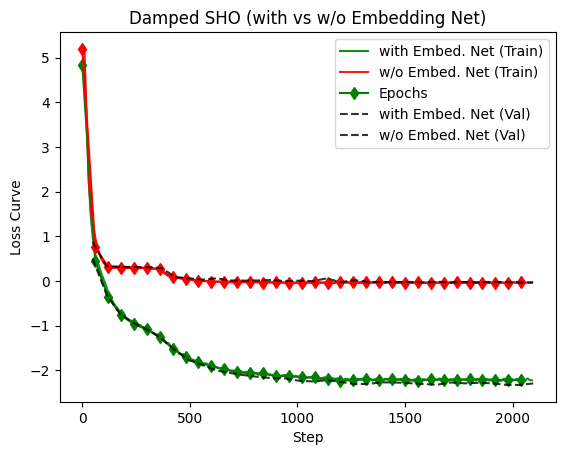

In [10]:
plt.plot(step_vals, ea1_vals, label='with Embed. Net (Train)', color='green', alpha=0.9)
plt.plot(step_vals, ea2_vals, label='w/o Embed. Net (Train)', c='red', alpha=0.9)
plt.plot(epoch_vals, ea1_epoch, marker='d', color='green', label='Epochs')
plt.plot(epoch_vals, ea2_epoch, marker='d', color='red')

plt.plot(step_vals_val, ea1_vals_val, label='with Embed. Net (Val)', color='black', alpha=0.8, linestyle="dashed")
plt.plot(step_vals_val, ea2_vals_val, label='w/o Embed. Net (Val)', color='black', alpha=0.8, linestyle="dashed")
# plt.plot(epoch_vals_val, ea1_epoch_val, marker='x', color='gray', alpha=0.3)
# plt.plot(epoch_vals_val, ea2_epoch_val, marker='d', color='black', alpha=0.3)


plt.xlabel('Step')
plt.ylabel('Loss Curve')
plt.title('Damped SHO (with vs w/o Embedding Net)')
plt.legend()
plt.show()